# Random MLB Stuff

## Teams and Team IDs (Baseball Savant)

In [ ]:
teams = [{'Team' : 'Los Angeles Angels', 'Team ID' : 108}
         ,{'Team' : 'Houston Astros', 'Team ID' : 117}
         ,{'Team' : 'Oakland Athletics', 'Team ID' : 133}
         ,{'Team' : 'Toronto Blue Jays', 'Team ID' : 141}
         ,{'Team' : 'Atlanta Braves', 'Team ID' : 144}
         ,{'Team' : 'Milwaukee Brewers', 'Team ID' : 158}
         ,{'Team' : 'St. Louis Cardinals', 'Team ID' : 138}
         ,{'Team' : 'Chicago Cubs', 'Team ID' : 112}
         ,{'Team' : 'Arizona Diamondbacks', 'Team ID' : 109}
         ,{'Team' : 'Los Angeles Dodgers', 'Team ID' : 119}
         ,{'Team' : 'San Francisco Giants', 'Team ID' : 137}
         ,{'Team' : 'Cleveland Guardians', 'Team ID' : 114}
         ,{'Team' : 'Seattle Mariners', 'Team ID' : 136}
         ,{'Team' : 'Miami Marlins', 'Team ID' : 146}
         ,{'Team' : 'New York Mets', 'Team ID' : 121}
         ,{'Team' : 'Washington Nationals', 'Team ID' : 120}
         ,{'Team' : 'Baltimore Orioles', 'Team ID' : 110}
         ,{'Team' : 'San Diego Padres', 'Team ID' : 135}
         ,{'Team' : 'Philadelphia Phillies', 'Team ID' : 143}
         ,{'Team' : 'Pittsburgh Pirates', 'Team ID' : 134}
         ,{'Team' : 'Texas Rangers', 'Team ID' : 140}
         ,{'Team' : 'Tampa Bay Rays', 'Team ID' : 139}
         ,{'Team' : 'Boston Red Sox', 'Team ID' : 111}
         ,{'Team' : 'Cincinnati Reds', 'Team ID' : 113}
         ,{'Team' : 'Colorado Rockies', 'Team ID' : 115}
         ,{'Team' : 'Kansas City Royals', 'Team ID' : 118}
         ,{'Team' : 'Detroit Tigers', 'Team ID' : 116}
         ,{'Team' : 'Minnesota Twins', 'Team ID' : 142}
         ,{'Team' : 'Chicago White Sox', 'Team ID' : 145}
         ,{'Team' : 'New York Yankees', 'Team ID' : 147}
        ]
teams = pd.DataFrame(teams)

## 2022 OPS Distribution

In [ ]:
import pandas as pd

In [ ]:
std = pd.read_csv('2022 MLB Batter Standard.csv')
adv = pd.read_csv('2022 MLB Batter Advanced.csv')

In [ ]:
print(std.columns)

In [ ]:
std['ID'] = std['Name'] + '-' + std['Tm']

In [ ]:
std = std.loc[:,['ID', 'Name', 'PA', 'AB', 'OPS']]

In [ ]:
std

In [ ]:
std = std[:(len(std) - 1)]

In [ ]:
print(adv.columns)

In [ ]:
adv['ID'] = adv['Name'] + '-' + adv['Tm']

In [ ]:
(adv['Name'] + '-' + adv['Tm'])[0]

In [ ]:
adv['Name'].iloc[0]

In [ ]:
std['Name'].iloc[986]

In [ ]:
adv['Name'].iloc[870]

In [ ]:
test = pd.read_csv('Advanced Batting.csv')

In [ ]:
test['Name'].iloc[0]

In [ ]:
std['ID'].replace('*', '', inplace = True)

In [ ]:
adv = adv[:(len(adv) -1)]

In [ ]:
adv.drop(columns = ['Rk', 'Name', 'Age', 'Tm', 'PA', '-9999'], axis = 1, inplace = True)

In [ ]:
std.merge(adv, on = 'ID')

In [ ]:
std['ID'].iloc[0]

In [ ]:
adv['Name'].iloc[0].replace('\xa0', ' ')

In [ ]:
adv['Name'].iloc[1].replace('\xa0', ' ', inplace = True)

In [ ]:
adv['Name'].iloc[0]

In [ ]:
adv['ID']

## Aaron Nola pitches

In [ ]:
import pandas as pd

Construct query from baseball savant Statcast Search. <br>
First I got breaking balls from Aaron Nola to LHB. <br>
Then I got every pitch Aaron Nola has ever thrown in his career. <br>

In [ ]:
df = pd.read_csv('Aaron Nola Every Pitch.csv')

### Exploring the Data

In [ ]:
df

In [ ]:
print(df.columns)

In [ ]:
df['stand'].unique()

In [ ]:
df = df[df['stand'] == 'L'] # Filter to only Left Handed Batters

In [ ]:
# Breaking Balls to Left handed batters
bb_lhb = df[df['pitch_type'].isin(['KC','CU'])]
# Can also use the pitch_name field

In [ ]:
df.head(20)

In [ ]:
last_game = df[df['game_date'] == '2023-06-28']

In [ ]:
print(last_game.columns)

In [ ]:
last_game = last_game.loc[:, ['pitch_type'
                             ,'release_speed'
                             ,'zone' # Zone location of the ball when it crosses the plate from the catcher's perspective
                             #,'des' # Plate appearance description from game day
                             ,'type' # B = ball, S = strike, X = in play
                             ,'balls' 
                             ,'strikes'
                             ,'pfx_x' # Horizontal movement in feet from the catcher's perspective 
                             ,'pfx_z' # Vertical movement in feet from the catcher's perspective
                             ,'plate_x' # Horizontal position of the ball when it crosses home plate from the catcher's perspective
                             ,'plate_z' # Vertical position of the ball when it crosses home plate from the catcher's perspective
                             #,'sv_id' # Non-unique id of play event per game
                             ,'sz_top' # Top of the batter's strike zone set by the operator when the ball is halfway to the plate
                             ,'sz_bot' # Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate
                             ,'at_bat_number' # Plate appearance number of the game
                             ,'pitch_number' # Total pitch number of the plate appearance
                             ,'pitch_name' # The name of the pitch derived from the Statcast Data                             
                             ]
                         ] 

In [ ]:
outside_bb = last_game[last_game['pitch_type'].isin(['KC','CU']) & last_game['zone'].isin([11.0,1.0,4.0,7.0,13.0])]
# Define outside breaking balls by pitch type and zone location
# Reference Statcast Zone Numbering visual if needed

In [ ]:
outside_bb

Okay, this is my algorithm, Eduardo! <br>
I have a way to identify breaking balls that were backdoor breaking balls to left-handed batters. Add a filter for pitches that were not put in play (type <> X) <br>
I know these pitches will be followed by something, so I need to come up with a way to identify the subsequent pitch that follows a backdoor breaking ball. <br>
Once I have that identified, then I can see what Aaron Nola most frequently follows up his backdoor breaking ball with.

last_game

In [ ]:
last_game.iloc[1]

In [ ]:
last_game['Next Pitch Type'] = last_game['pitch_type'].shift(1)

In [ ]:
last_game

### Breaking Pitches to LHB and the Following Pitch

In [ ]:
df = pd.read_csv('Aaron Nola Every Pitch.csv')

In [ ]:
lhb = df[df['stand'] == 'L'] # Filter to Only Left Handed Batters

In [ ]:
# Select Columns
lhb = lhb.loc[:, ['pitch_type'
                 ,'release_speed'
                 ,'zone' # Zone location of the ball when it crosses the plate from the catcher's perspective
                 ,'type' # B = ball, S = strike, X = in play
                 ,'balls' 
                 ,'strikes'
                 ,'pfx_x' # Horizontal movement in feet from the catcher's perspective 
                 ,'pfx_z' # Vertical movement in feet from the catcher's perspective
                 ,'plate_x' # Horizontal position of the ball when it crosses home plate from the catcher's perspective
                 ,'plate_z' # Vertical position of the ball when it crosses home plate from the catcher's perspective
                 ,'sz_top' # Top of the batter's strike zone set by the operator when the ball is halfway to the plate
                 ,'sz_bot' # Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate
                 ,'at_bat_number' # Plate appearance number of the game
                 ,'pitch_number' # Total pitch number of the plate appearance
                 ,'pitch_name' # The name of the pitch derived from the Statcast Data                             
                 ]
             ] 

In [ ]:
# Then add columns for data from the subsequent pitch
for c in lhb.columns:
    lhb['np_'+c] = lhb[c].shift(1)

In [ ]:
# Filter to pitches that were not put in play, were breaking balls, and were on the outside part of the plate
lhb = lhb[(lhb['type'] != 'X') & (lhb['pitch_type'].isin(['KC', 'CU'])) & (lhb['zone'].isin([11.0,1.0,4.0,7.0,13.0]))]

In [ ]:
lhb.groupby(['np_pitch_name','np_zone']).count()

## Zack Wheeler pitches

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Zack Wheeler Every Pitch.csv')

In [ ]:
# Select Columns
df = df.loc[:, ['game_date'
                 ,'pitch_type'
                 ,'release_speed'
                 ,'zone' # Zone location of the ball when it crosses the plate from the catcher's perspective
                 ,'type' # B = ball, S = strike, X = in play
                 ,'balls' 
                 ,'strikes'
                 ,'pfx_x' # Horizontal movement in feet from the catcher's perspective 
                 ,'pfx_z' # Vertical movement in feet from the catcher's perspective
                 ,'plate_x' # Horizontal position of the ball when it crosses home plate from the catcher's perspective
                 ,'plate_z' # Vertical position of the ball when it crosses home plate from the catcher's perspective
                 ,'sz_top' # Top of the batter's strike zone set by the operator when the ball is halfway to the plate
                 ,'sz_bot' # Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate
                 ,'at_bat_number' # Plate appearance number of the game
                 ,'pitch_number' # Total pitch number of the plate appearance
                 ,'pitch_name' # The name of the pitch derived from the Statcast Data                             
                 ]
             ] 

df['game_date'] = pd.to_datetime(df['game_date'])

# I need to figure out a way to to do this automatically
y2023 = df[df.game_date.dt.year == 2023]
y2022 = df[df.game_date.dt.year == 2022]
y2021 = df[df.game_date.dt.year == 2021]
y2020 = df[df.game_date.dt.year == 2020]
y2019 = df[df.game_date.dt.year == 2019]
y2018 = df[df.game_date.dt.year == 2018]
y2017 = df[df.game_date.dt.year == 2017]
y2016 = df[df.game_date.dt.year == 2016]
y2015 = df[df.game_date.dt.year == 2015]
y2014 = df[df.game_date.dt.year == 2014]
y2013 = df[df.game_date.dt.year == 2013]

all_years = [y2023, y2022, y2021, y2020, y2019, y2018, y2017, y2016, y2015, y2014, y2013]
phillies = [y2023, y2022, y2021, y2020]
mets = [y2019, y2018, y2017, y2016, y2015, y2014, y2013]


In [ ]:
df.groupby(['pitch_name']).count()#.mean('release_speed')

In [ ]:
df.groupby(['pitch_name',df.game_date.dt.year]).mean()

In [ ]:
y2023 = df[df.game_date.dt.year == 2023]

In [ ]:
y2023.pitch_name.unique()

In [ ]:
y2023.groupby('pitch_name').count()

In [ ]:
y2023.groupby('pitch_name').count()/len(y2023)

In [ ]:
for y in all_years:
    y.groupby['pitch_type'].count()/len(y)

In [ ]:
df.groupby([df.pitch_type, df.game_date.dt.year]).count()

In [ ]:
df.groupby([df.pitch_name, df.game_date.dt.year]).mean().iloc[:,0]

In [ ]:
for m in mets:
    print(m)

In [ ]:
mets_df = pd.DataFrame()
for m in mets:
    mets_df = pd.concat([mets_df, m])

In [ ]:
phils_df = pd.DataFrame()
for p in phillies:
    phils_df = pd.concat([phils_df, p])

In [ ]:
for y in all_years:
    y.groupby('pitch_name').mean().iloc[:

In [ ]:
avgFB_velo = pd.DataFrame()
for y in all_years:
    speeds = pd.DataFrame(y.groupby('pitch_type').mean().iloc[:,0])
    speeds['Year'] = y.game_date.dt.year[0]
    avgFB_velo = pd.concat([avgFB_velo, speeds])

In [ ]:
y2023.game_date.dt.year[0]

In [ ]:
speeds

## Just Every Pitch of the First Half

In [ ]:
import pandas as pd

In [ ]:
team_pitching = pd.read_csv('Expected Pitching by Team as of 7-8-23.csv')
team_catching = pd.read_csv('Catching by Team as of 7-8-23.csv')
team_batting = pd.read_csv('Expected Batting by Team as of 7-8-23.csv')

team_catching.dropna(inplace=True)

combined = pd.merge(team_pitching, team_catching, left_on = 'team', right_on = 'team_name', suffixes = ('_p','_c'))

In [ ]:
print(team_pitching.columns)

In [ ]:
print(team_catching.columns)

In [ ]:
team_catching

In [ ]:
team_pitching

In [ ]:
print(combined.columns)

In [ ]:
data = combined.loc[:,['team'
                           ,'year_p'
                           ,'pa'
                           ,'bip'
                           ,'ba'
                           ,'est_ba'
                           ,'est_ba_minus_ba_diff'
                           ,'slg'
                           ,'est_slg'
                           ,'est_slg_minus_slg_diff'
                           ,'woba'
                           ,'est_woba'
                           ,'est_woba_minus_woba_diff'
                           ,'runs_extra_strikes'
                          ]
                       ]

In [ ]:
data.sort_values(by = 'est_woba_minus_woba_diff', ascending = False)

In [ ]:
data.plot.scatter(x='est_woba

In [ ]:
obp = pd.read_csv('Expected On Base by Team as of 7-8-23.csv')

In [ ]:
pitching = pd.merge(combined, obp, left_on = 'team_id_p', right_on = 'player_id', suffixes = ('','_obp'))

In [ ]:
pitching

In [ ]:
print(pitching.columns)

In [ ]:
obp

In [ ]:
data = pitching.loc[:,['team'
                           ,'year_p'
                           ,'pa'
                           ,'bip'
                           ,'ba'
                           ,'est_ba'
                           ,'est_ba_minus_ba_diff'
                           ,'slg'
                           ,'est_slg'
                           ,'est_slg_minus_slg_diff'
                           ,'woba'
                           ,'est_woba'
                           ,'est_woba_minus_woba_diff'
                           ,'runs_extra_strikes'
                          ]
                       ]

## Running Splits Graph

In [ ]:
# Not gonna be as cool as the Race on Baseball Savant's page

In [ ]:
import pandas as pd
import glob
import os

df = pd.read_csv('running_splits.csv')

In [ ]:
df

In [ ]:
tempo = pd.read_csv('pitch_tempo.csv')

In [ ]:
print(tempo.columns)

In [ ]:
tempo.groupby(['team_id']).sum('median_seconds_empty').sort_values(by='median_seconds_empty')

## Phillies Number of Pitches and Results

In [ ]:
import pandas as pd
import os
import glob

In [ ]:
data = pd.read_csv('2023 Phillies Every Pitch All Time.csv')

In [ ]:
data = pd.read_csv('547180_data.csv')

In [ ]:
print(data.columns)

In [ ]:
data.at_bat_number.unique()

In [ ]:
data.drop(columns = ['batter'
                    #,'description'
                    ,'des'
                    ,'game_type'
                    ,'stand'
                    ,'
                    ]
          

In [ ]:
data.zone.unique()

## Phillies Chase Rate and Whiff%

In [ ]:
# Rob Thomson Just Managed His Fucking Ass Off!

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
data = pd.read_csv('percentile_rankings.csv')

In [ ]:
data

## Team Outs Above Average

In [ ]:
import pandas as pd
import glob
import os

teams = [{'Team' : 'Los Angeles Angels', 'Team ID' : 108}
         ,{'Team' : 'Houston Astros', 'Team ID' : 117}
         ,{'Team' : 'Oakland Athletics', 'Team ID' : 133}
         ,{'Team' : 'Toronto Blue Jays', 'Team ID' : 141}
         ,{'Team' : 'Atlanta Braves', 'Team ID' : 144}
         ,{'Team' : 'Milwaukee Brewers', 'Team ID' : 158}
         ,{'Team' : 'St. Louis Cardinals', 'Team ID' : 138}
         ,{'Team' : 'Chicago Cubs', 'Team ID' : 112}
         ,{'Team' : 'Arizona Diamondbacks', 'Team ID' : 109}
         ,{'Team' : 'Los Angeles Dodgers', 'Team ID' : 119}
         ,{'Team' : 'San Francisco Giants', 'Team ID' : 137}
         ,{'Team' : 'Cleveland Guardians', 'Team ID' : 114}
         ,{'Team' : 'Seattle Mariners', 'Team ID' : 136}
         ,{'Team' : 'Miami Marlins', 'Team ID' : 146}
         ,{'Team' : 'New York Mets', 'Team ID' : 121}
         ,{'Team' : 'Washington Nationals', 'Team ID' : 120}
         ,{'Team' : 'Baltimore Orioles', 'Team ID' : 110}
         ,{'Team' : 'San Diego Padres', 'Team ID' : 135}
         ,{'Team' : 'Philadelphia Phillies', 'Team ID' : 143}
         ,{'Team' : 'Pittsburgh Pirates', 'Team ID' : 134}
         ,{'Team' : 'Texas Rangers', 'Team ID' : 140}
         ,{'Team' : 'Tampa Bay Rays', 'Team ID' : 139}
         ,{'Team' : 'Boston Red Sox', 'Team ID' : 111}
         ,{'Team' : 'Cincinnati Reds', 'Team ID' : 113}
         ,{'Team' : 'Colorado Rockies', 'Team ID' : 115}
         ,{'Team' : 'Kansas City Royals', 'Team ID' : 118}
         ,{'Team' : 'Detroit Tigers', 'Team ID' : 116}
         ,{'Team' : 'Minnesota Twins', 'Team ID' : 142}
         ,{'Team' : 'Chicago White Sox', 'Team ID' : 145}
         ,{'Team' : 'New York Yankees', 'Team ID' : 147}
        ]
teams = pd.DataFrame(teams)

In [ ]:
# Get Winning Percentage from Baseball Reference
# Might be worth setting up an actual scrape here

standings = pd.DataFrame()
years = range(2016,2024)
for y in years:
    df = pd.read_csv(str(y)+' Team W-L.csv')
    df['Year'] = y
    standings = pd.concat([standings, df])
    
win_pct = standings[['Year', 'Tm', 'W-L%']]
win_pct = win_pct[win_pct['Tm'] != 'Average']
win_pct['id'] = win_pct.Year.astype(str) + ' ' + win_pct.Tm
win_pct.replace('Cleveland Indians', 'Cleveland Guardians', inplace = True)

In [ ]:
# Get Outs Above Average from Baseball Savant
# There also has to be a better way to do this methinks

fteam_oaa = pd.read_csv('fielding_team_outs_above_average.csv')
fteam_oaa['team'] = fteam_oaa.team_name + ' ' + fteam_oaa.team_id.astype(str)
oaa = pd.merge(fteam_oaa, teams, left_on = 'team_id', right_on = 'Team ID', suffixes = ('', '_lu'))
oaa['id'] = oaa['year'].astype(str) + ' ' + oaa['Team'] 
oaa = oaa[['id', 'outs_above_average']]

In [ ]:
# Merge the DataFrames together and Let's find the correlation
data = pd.merge(oaa, win_pct, on = 'id', suffixes = ('','_y'))
data['outs_above_average'].corr(data['W-L%']) # It is not very strong (r = 0.302)

In [ ]:
data.plot.scatter('W-L%', 'outs_above_average')

## Michael Lorenzen pitches

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Michael Lorenzen Every Pitch.csv')

In [ ]:
data.game_date = pd.to_datetime(data.game_date)

In [ ]:
cy = data[data.game_date.dt.year == 2023]

In [ ]:
phillies = cy[cy.game_date > '2023-08-01']
tigers = cy[cy.game_date < '2023-08-01']

In [ ]:
# Just for 2023
# This groups divides the count of pitches grouped by type and month from the count of pitches grouped by month
(cy.groupby(by = [cy.game_date.dt.month, cy.pitch_name]).count()/cy.groupby(by = [cy.game_date.dt.month]).count()).pitch_type

In [ ]:
# For Enitre Career - Not Great to Look At
(data.groupby(by = [data.game_date.dt.month, data.game_date.dt.year, data.pitch_name]).count()/data.groupby(by = [data.game_date.dt.month, data.game_date.dt.year]).count()).pitch_type

## Is Joey Gallo a Good Defender?

In [ ]:
import pandas as pd
import glob

In [ ]:
data = pd.read_csv('fielder_outs_above_average.csv')

In [ ]:
data[data.last_name == 'Gallo'].sort_values(by = 'year')

## Quien es El Mejor Papa? (High Ideas Written Down)

In [ ]:
# Jeff Hoffman Father of 4

In [ ]:
# my comments are me writing the tweets that I can no longer run

In [ ]:
# Robert Garcia in the game

In [ ]:
# So this is what I should do

In [ ]:
# Get super fukcing high and open up a Jupyter notebook where I can just keep my thoughts. That is essentially what Twitter was for me

In [ ]:
# With the major fucking exception that I had potential for elite social fulfillment

In [ ]:
# But for the most part I could get utility out of the object without the social interaction of it all

In [ ]:
# Without Twitter I have no pulse of normal social interactions

In [ ]:
# Because for whatever fucking reason I rely on my online interactions more than my person-to-person contact

In [ ]:
# But that shit is valuable and affects people so I need to do a better job of reaching out to my teammates and being friendlier

In [ ]:
# It is not about being excellent at what you do and defensive of the people around us.

In [ ]:
# Patrick can I just add?

In [ ]:
# No, I cannot just add because Patrick dominates the scene for us

In [ ]:
# Erik Evjen is the face of Symphony, right?

In [ ]:
# Zeek Coleman is the rising superstar who got poached by Tourism Economics

In [ ]:
# He gets assigned to the hottest part of the business because that is what makes him important

In [ ]:
# Is Zeek above a CEO of a DMO?

In [ ]:
# These are the interesting social interactions that I want to follow

In [ ]:
# My Soap Operas

In [ ]:
# Bryce Harper hhad to put his fucking ARM brace back on because what a fucking idiotic thing to do that was

In [ ]:
# But I think I am supposed to love Bryce Harper more than anything else in teh world?

In [ ]:
# That will be an interesting situation

In [ ]:
# Who the FUCK is this guy coming in for the Washington Nationals?

In [ ]:
# Did he play for the Cincinnati Reds at one point in his career?

In [ ]:
# Aaron Putnam values the interpersonal interactions, ya know

In [ ]:
# He is old school, he described perfectly what Ryan Gaskill was on to

In [ ]:
# That was such a wild fucking thing to do

In [ ]:
# Like Gaskill was such a funny guy to have as a Fantasy Football League guy

## Baseball Savant Scraper Library

In [ ]:
import baseball_scraper
import pandas as pd
import datetime

### Gather Stacast Data

Pulls for all years of Stacast data

In [ ]:
print(test.columns)

In [ ]:
data[data.game_date == data.game_date.max()]

In [ ]:
for y in data.Year_KS.unique():
    

In [ ]:
data.groupby('Year_KS').agg({'game_date':'count'})

In [ ]:
#years = list(range(2015,2024))

#data = pd.DataFrame()

years = list(range(2015,2024))
for y in years:
    df = statcast(str(y)+'-01-01', str(y)+'-12-31') # Pull all stacast pitch data for a year in the list that I am providing
    df['year'] = y # Assign that year as a column so I can key off later
    data = pd.concat([data, df]) # Stick this year's data into our collection

In [ ]:
data.to_csv('Statcast Full History_08-26-2023.csv')

In [ ]:
data[data.game_year != 2023].to_csv('Statcast 2015 to 2022.csv', index = None)

#### Load History - Where The Magic Happens!

This chunk will:
1. import pandas, the baseball_scraper, and datetime libraries <br>
2. the current year, January 1st of the current year, Dec 31st of the current year, and the previous year <br>
    get from today   construct using current year     construct using current year      subtract from current year <br>
3. Loads the history based on a csv that is up through the previous year <br>
    Pulled history once and wrote to a csv that will probably need updated at the end of the year <br>
4. Scrapes the current statcast data from the start of the current year to the today <br>
    This query will take a moment to complete <br>
5. Combines history and current data

In [ ]:
import pandas as pd
from baseball_scraper import statcast
import datetime

today = datetime.date.today()
cy = today.year
jan_1_cy = '{}-01-01'.format(str(cy))
dec_31_cy = '{}-12-31'.format(str(cy))
py = cy-1

history = pd.read_csv('Statcast 2015 to {}.csv'.format(str(py)))
current = statcast(jan_1_cy, dec_31_cy)

data = pd.concat([history, current])

In [ ]:
data.tail(1)[['player_name', 'batter', 'pitcher', 'pitcher.1']]

In [ ]:
print(data.columns)

### Get Team and Player Data

Get Player Id and Team Id Reference Tables

# Team IDs: PHL - 143, STL - 135

In [ ]:
teams = [{'Team' : 'Los Angeles Angels', 'Team ID' : 108}
         ,{'Team' : 'Houston Astros', 'Team ID' : 117}
         ,{'Team' : 'Oakland Athletics', 'Team ID' : 133}
         ,{'Team' : 'Toronto Blue Jays', 'Team ID' : 141}
         ,{'Team' : 'Atlanta Braves', 'Team ID' : 144}
         ,{'Team' : 'Milwaukee Brewers', 'Team ID' : 158}
         ,{'Team' : 'St. Louis Cardinals', 'Team ID' : 138}
         ,{'Team' : 'Chicago Cubs', 'Team ID' : 112}
         ,{'Team' : 'Arizona Diamondbacks', 'Team ID' : 109}
         ,{'Team' : 'Los Angeles Dodgers', 'Team ID' : 119}
         ,{'Team' : 'San Francisco Giants', 'Team ID' : 137}
         ,{'Team' : 'Cleveland Guardians', 'Team ID' : 114}
         ,{'Team' : 'Seattle Mariners', 'Team ID' : 136}
         ,{'Team' : 'Miami Marlins', 'Team ID' : 146}
         ,{'Team' : 'New York Mets', 'Team ID' : 121}
         ,{'Team' : 'Washington Nationals', 'Team ID' : 120}
         ,{'Team' : 'Baltimore Orioles', 'Team ID' : 110}
         ,{'Team' : 'San Diego Padres', 'Team ID' : 135}
         ,{'Team' : 'Philadelphia Phillies', 'Team ID' : 143}
         ,{'Team' : 'Pittsburgh Pirates', 'Team ID' : 134}
         ,{'Team' : 'Texas Rangers', 'Team ID' : 140}
         ,{'Team' : 'Tampa Bay Rays', 'Team ID' : 139}
         ,{'Team' : 'Boston Red Sox', 'Team ID' : 111}
         ,{'Team' : 'Cincinnati Reds', 'Team ID' : 113}
         ,{'Team' : 'Colorado Rockies', 'Team ID' : 115}
         ,{'Team' : 'Kansas City Royals', 'Team ID' : 118}
         ,{'Team' : 'Detroit Tigers', 'Team ID' : 116}
         ,{'Team' : 'Minnesota Twins', 'Team ID' : 142}
         ,{'Team' : 'Chicago White Sox', 'Team ID' : 145}
         ,{'Team' : 'New York Yankees', 'Team ID' : 147}
        ]
teams = pd.DataFrame(teams)

phillies = 'Philadelphia Phillies'
opponent = 'Los Angeles Angels'

In [ ]:
philsgame_team_ids = list(teams[teams.Team.isin([phillies, opponent ])]['Team ID'])

## Player Lookup Table Grabbed From Internet

In [ ]:
players = pd.read_csv('SFBB Player ID Map - PLAYERIDMAP.csv')
player_lookup_source = 'https://www.smartfantasybaseball.com/tools/'

In [ ]:
phillies_lineup = ['Kyle Schwarber'
                   ,'Trea Turner'
                   ,'Nick Castellanos'
                   ,'Bryce Harper'
                   ,'Alec Bohm'
                   ,'Bryson Stott'
                   ,'J.T. Realmuto'
                   ,'Jake Cave'
                   ,'Brandon Marsh'
                  ]

In [ ]:
lineup_ids = players[players.PLAYERNAME.isin(phillies_lineup)].MLBID

In [ ]:
players[players.PLAYERNAME.isin(phillies_lineup)][['PLAYERNAME','MLBID']]

In [ ]:
phillies_batters = data[data.batter.isin(lineup_ids)]

In [ ]:
schwarber = phillies_batters[phillies_batters.batter == 656941]

In [ ]:
schwarber.game_date = pd.to_datetime(schwarber.game_date)

In [ ]:
print(schwarber.columns)

In [ ]:
pitchers = players[players['PLAYERNAME'].isin(['Taijuan Walker', 'Lucas Giolito'])][['PLAYERNAME', 'MLBID']]

In [ ]:
pitcher_data = data[data.pitcher.isin(pitchers.MLBID)]

In [ ]:
giolito = pitcher_data[pitcher_data.pitcher == 608337]

In [ ]:
print(data.columns)

In [ ]:
giolito[(giolito.game_year == 2023)].batting_team.unique()

In [ ]:
giolito_vs_cave = 

In [ ]:
walker = data[data.pitcher == 592836]

In [ ]:
angels_lineup = ['Nolan Schanuel'
                 ,'Shohei Ohtani'
                 ,'Brandon Drury'
                 ,'Mike Moustakas'
                 ,'Luis Rengifo'
                 ,'Mickey Moniak'
                 ,"Logan O'Hoppe"
                 ,'Trey Cabbage'
                 ,'Randal Grichuk'
                ]

In [ ]:
angels_ids = players[players.PLAYERNAME.isin(angels_lineup)].MLBID

In [ ]:
players[players.PLAYERNAME == 'Craig Kimbrel'].MLBID

In [ ]:
data[(data.game_year == 2023) & (data.pitcher == 518886)].game_date.unique()

In [ ]:
data[(data.game_year == 2023)].game_date.unique()

In [ ]:
data.groupby('game_date').agg({'game_date' : 'count'})

In [ ]:
data.groupby('game_year').agg({'game_date' : 'count'})

## Grandma Short died today.

# Mercy

In [ ]:
import pandas as pd
import os
import glob

In [ ]:
phillies_batting_history = pd.read_csv('Phillies Batting History.csv')

In [ ]:
phillies_batting_history.game_date.min()

# Phillies Defense

## Lorenzen vs Padres

In [ ]:
import pandas as pd
lorenzen = pd.read_csv('savant_data (1).csv')

In [ ]:
print(lorenzen.columns)

In [ ]:
lorenzen[lorenzen.player_name == 'Carpenter, Matt']

In [ ]:
lorenzen.groupby('player_name').agg({'pitch_type' : 'count'}).sort_values()

In [ ]:
lorenzen.player_name.unique()

In [ ]:
bip = lorenzen[lorenzen.description.isin(['hit_into_play'])]


In [ ]:
lorenzen.groupby(description).agg({'

In [ ]:
lorenzen[lorenzen.player_name == 'Soto, Juan']

# Phillies Offense

## Campusano Catching

In [ ]:
import pandas as pd

In [ ]:
campusano = pd.read_csv('')

# Braves Series

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
data = pd.read_csv('braves.csv')
player_ids = pd.read_csv('SFBB Player ID Map - PLAYERIDMAP.csv')

In [ ]:
wheeler = data[data.pitcher == 554430] # Zack Wheeler
fried = data[data.pitcher == 608331] # Max Fried

In [ ]:
strider = data[data.pitcher == 554430] # Spencer Strider
sanchez = data[data.pitcher == 608331] # Cristopher Sanchez

In [ ]:
phillies_relievers = data[data.pitcher.isin(phillies_relievers)] # Phillies Relievers
braves_relievers = data[data.pitcher.isin(braves_srelievers)] # Braves Relievers

In [ ]:
phillies_defense = data[data.1b.isin([phillies_lineup

In [ ]:
braves_batters

In [ ]:
phillies_batters.batter == phillies_batters[player_ids.PLAYERNAME.isin('Alec Bohm')]

In [ ]:
harper = phillies_batters[phillies_batters.PLAYAERNAME == 'Bryce Harper']

In [ ]:
phillies_lineup = ['Kyle Schwarber'
                   ,'Trea Turner'
                   ,'Nick Castellanos'
                   ,'Bryce Harper'
                   ,'Alec Bohm'
                   ,'Bryson Stott'
                   ,'J.T. Realmuto'
                   ,'Jake Cave'
                   ,'Brandon Marsh'
                   ,'Johan Rojas'
                  ]

lineup_ids = player_ids[player_ids.PLAYERNAME.isin(phillies_lineup)].MLBID
phillies_batters = data[data.batter.isin(lineup_ids)]

In [ ]:
braves_lineup = ['Ronald Acuna Jr.'
                   ,'Ozzie Albies'
                   ,'Austin Riley'
                   ,'Matt Olson'
                   ,'Sean Murphy'
                   ,'Marcell Ozuna'
                   ,'Michael Harris II'
                   ,'Eddy Lewis'
                   ,'Luke Williams'
                   ,"Travis d'Arnaud"
                  ]

lineup_ids = player_ids[player_ids.PLAYERNAME.isin(braves_lineup)].MLBID
braves_batters = data[data.batter.isin(lineup_ids)]

In [ ]:
strider = phillies_batters[phillies_batters['player_name'] == 'Strider, Spencer']

In [ ]:
phillies_batters[player_ids[player_ids.PLAYERNAME == 'Bryson Stott'].MLBID

In [ ]:
batter_strider = phillies_batters.player_name == 'Spencer Strider'

In [ ]:
strider

In [ ]:
braves_batters[braves_batters.player_name == 'Sanchez, Cristopher'])

In [ ]:
player_ids[player_ids['FIRSTNAME'] == 'Orlando'].mlbamid

In [ ]:
braves

In [ ]:
645261_data

## Mets

In [ ]:
import pandas as pd

pitchers = pd.read_csv('2023-09-22_pitcher_data.csv')
batters = pd.read_csv('2023-09-22_batter_data.csv')

In [ ]:
soto = pitchers[pitchers['player_name'] == 'Soto, Gregory']

In [ ]:
print(soto.columns)

In [ ]:
soto.groupby('batter').agg({'pitch_type' : 'count', 'estimated_ba_using_speedangle' : 'mean'}).sort_values(by = 'pitch_type', ascending = False).head(25)

In [ ]:
smith = pitchers[pitchers.player_name == 'Smith, Drew']

In [ ]:
batter_ids = pd.read_csv('2023-09-22_batter_ids.csv')

In [ ]:
batter_ids[batter_ids.name_last.isin(['stott','realmuto','castellanos','marsh', 'rojas'])]

In [ ]:
batter_ids

In [ ]:
smith

In [ ]:
kimbrel = pitchers[pitchers.player_name == 'Kimbrel, Craig']

In [ ]:
kimbrel

In [ ]:
print(kimbrel.columns)

In [ ]:
kimbrel.groupby('pitch_name').agg{'pitch_name' : 'count'}/len(kimbrel)

In [ ]:
raley = pitchers[pitchers.player_name == 'Raley, Brooks']

In [ ]:
raley.groupby('stand').agg({'estimated_ba_using_speedangle' : 'mean'})

In [ ]:
raley.stand.unique()

In [ ]:
for c in raley.columns:
    print(c)
    print(raley[c].iloc[0])

In [ ]:
raley.agg({'

In [ ]:
seranthony = pitchers[pitchers.player_name == 'Dominguez, Seranthony']

In [ ]:
pitcher_ids = pd.read_csv('2023-09-22_pitcher_ids.csv')

In [ ]:
seranthony = pitchers[pitchers.pitcher == 622554]

In [ ]:
seranthony.agg({'estimated_ba_using_speedangle' : 'mean', '})

In [ ]:
print(seranthony.columns)

In [ ]:
pitcher_ids

In [ ]:
batters

# THIS is the Algorithm, Eduardo!

I want to study want Michael Imburgio and Sam Goldberg (?) did to classify players using deep learning or some shit <br>
I can classify baseball players as archetypes and that will help me to compare players to each other? <br>
This way I can see how a batter matches up to this archetype of pitcher even if they have not faced this exact pitcher before <br>
This is also relevant because players change their approach. So is Mike Lorenzen in 2023 the SP for the Phillies the same guy who JT Realmuto faced in 2016 in a random Marlins vs Reds game?

There is value in knowing what is currently happening, but that is really difficult.

Instead, statisticians and economists study what happened in the past?

I want to think in the now.

## Phillies Playoff Preparations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get all the data in
pl2023 = pd.read_csv('phillies lineup_2023.csv')
pb2023 = pd.read_csv('phillies bench_2023.csv')
b_playoff = pd.read_csv('phillies batters_playoff history.csv')
phils_batters_nlwc_nlds = pd.read_csv('phils_batters_nlwc_nlds.csv')
ps2023 = pd.read_csv('phillies starters_2023.csv')
pr2023 = pd.read_csv('phillies relievers_2023.csv')
p_playoff = pd.read_csv('phillies pitchers_playoff history.csv')
phils_pitchers_nlwc_nlds = pd.read_csv('phils_pitchers_nlwc_nlds.csv')
jean = pd.read_csv('segura_playoffs.csv')
b_2023_09_30 = pd.read_csv('phillies_batters_2023-09030.csv')
p_2023_09_30 = pd.read_csv('phillies_pitchers_2023-09030.csv')
b_2023_10_01 = pd.read_csv('phillies_pitchers_2023_10_01.csv')
p_2023_10_01 = pd.read_csv('phillies_batters_2023_10_01.csv')

woba_weights = pd.read_csv('wOBA and FIP Constants.csv')


## WC -- Marlins
ml2023 = pd.read_csv('marlins_lineup_2023.csv')
mb2023 = pd.read_csv('marlins_bench_2023.csv')
m_b_playoff = pd.read_csv('marlins_batters_playoff history.csv')
ms2023 = pd.read_csv('marlins_starters_2023.csv')
mr2023 = pd.read_csv('marlins_relievers_2023.csv')
m_p_playoff = pd.read_csv('marlins_pitchers_playoff history.csv')

## NLDS -- Braves
## KS Notes - I was in Raleigh for this series, no data analyses since I was spending time with my family.
## KS Notes - I am super fucking baked rn, to put mildly this is a risky play. Baking and Coding?

## NLCS -- Diamondbacks
b_db2023 = pd.read_csv('az_batters_2023.csv')
p_db2023 = pd.read_csv('az_pitchers_2023.csv')
b_db_playoffs = pd.read_csv('az_batters_playoffs.csv')
p_db_playoffs = pd.read_csv('az_pitchers_playoffs.csv')
b_az_vs_phillies_history = pd.read_csv('b_az_vs_phillies_history.csv')
p_az_vs_phillies_history = pd.read_csv('b_az_vs_phillies_history.csv')


# Mash them together
b_2023 = pd.concat([pl2023, pb2023, b_2023_09_30, b_2023_10_01, ml2023, mb2023])
p_2023 = pd.concat([ps2023, pr2023, p_2023_09_30, p_2023_10_01, ms2023, mr2023])
reg2023 = pd.concat([b_2023, p_2023]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')
playoffs = pd.concat([b_playoff, p_playoff, jean, m_b_playoff, m_p_playoff]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')

In [ ]:
print(playoffs.columns)

In [ ]:
for c in playoffs.columns:
    print('\033[1m' + c + '\033[0m')
    print(playoffs[c].iloc[0])

In [ ]:
# Ranger Pitch Sequencing
# Fuck this is really gonna mess up my actual organization, lol.
# My acutal organization was derivative bullshit!

## Get Stats Function
This function takes in a dataframe (which you should filter) and level to aggregate the data at (ex. player, player/year, team, team/year, etc.) <br>
It will return the result statistics for that

In [ ]:
def get_stats(level, df):
    # Pitchesa

    pitches = df.groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'count' : 'pitches'})

    # Plate Appearances
    plate_apps = df[~df.events.replace(pd.np.nan, 'NA').isin(['NA','pickoff_1b'])].groupby(level).agg({'batter' : 'count'})

    plate_apps =plate_apps.reset_index().rename(columns = {'batter' : 'plate_apps'})

    # At Bats
    at_bats = df[~df.events.replace(pd.np.nan, 'NA').isin(['NA'
                                                       ,'pickoff_1b'
                                                       , 'walk'
                                                       , 'intent_walk'
                                                       , 'hit_by_pitch'
                                                      ,'sac_fly'
                                                      ,'sac_bunt'])].groupby(level).agg({'batter' : 'count'})

    at_bats = at_bats.reset_index().rename(columns = {'batter' : 'at_bats'})

    # Hits
    hits = df[df.events.isin(['home_run'
                          ,'single'
                          ,'double'
                          ,'triple'
                         ])].groupby(level).agg({'batter' : 'count'})

    hits = hits.reset_index().rename(columns = {'batter' : 'hits'})

    # Singles
    singles = df[df.events == 'single'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'singles'})
    # Doubles
    doubles = df[df.events == 'double'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'doubles'})
    # Triples
    triples = df[df.events == 'triple'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'triples'})
    # Home Runs
    hrs = df[df.events == 'home_run'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'hrs'})
    # Walks
    walks = df[df.events == 'walk'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'walks'})
    # Hit By Pitch
    hbp = df[df.events == 'hit_by_pitch'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'hbp'})
    # Weighted Walks
    wBB = df[df.events == 'walk'].groupby(level).agg({'wBB' : 'sum'}).reset_index()
    # Weighted HBP
    wHBP = df[df.events == 'hit_by_pitch'].groupby(level).agg({'wHBP' : 'sum'}).reset_index()
    # Weighted Singles
    w1B = df[df.events == 'single'].groupby(level).agg({'w1B' : 'sum'}).reset_index()
    # Weighted Doubles
    w2B = df[df.events == 'double'].groupby(level).agg({'w2B' : 'sum'}).reset_index()
    # Weighted Triples
    w3B = df[df.events == 'triple'].groupby(level).agg({'w3B' : 'sum'}).reset_index()
    # Weighted Home runs
    wHR = df[df.events == 'home_run'].groupby(level).agg({'wHR' : 'sum'}).reset_index()

    a = pitches.merge(plate_apps, how = 'left', left_on = level, right_on = level)
    b = a.merge(at_bats, how = 'left', left_on = level, right_on = level)
    c = b.merge(hits, how = 'left', left_on = level, right_on = level)
    d = c.merge(singles, how = 'left', left_on = level, right_on = level)
    e = d.merge(doubles, how = 'left', left_on = level, right_on = level)
    f = e.merge(triples, how = 'left', left_on = level, right_on = level)
    g = f.merge(hrs, how = 'left', left_on = level, right_on = level)
    h = g.merge(walks, how = 'left', left_on = level, right_on = level)
    i = h.merge(hbp, how = 'left', left_on = level, right_on = level)
    j = i.merge(wBB, how = 'left', left_on = level, right_on = level)
    k = j.merge(wHBP, how = 'left', left_on = level, right_on = level)
    l = k.merge(w1B, how = 'left', left_on = level, right_on = level)
    m = l.merge(w2B, how = 'left', left_on = level, right_on = level)
    n = m.merge(w3B, how = 'left', left_on = level, right_on = level)
    stats = n.merge(wHR, how = 'left', left_on = level, right_on = level)

    stats = stats.replace(pd.np.nan, 0)
    
    return stats

In [ ]:
# Extra things to consider
# Additional Columns:
# Expected BA, OBP, SLG, wOBA
# FIP

# How to Visualize
# 3x3 grid of subplots, group at the player and zone level then plot in each area of the strike zone
# Higher level callouts
# grid of subplots for each of the players, group by players

In [ ]:
def get_player_stats(df):
    # Pitches

    pitches = df.groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'count' : 'pitches'})

    # Plate Appearances
    plate_apps = df[~df.events.replace(pd.np.nan, 'NA').isin(['NA','pickoff_1b'])].groupby('player_name').agg({'batter' : 'count'})

    plate_apps =plate_apps.reset_index().rename(columns = {'batter' : 'plate_apps'})

    # At Bats
    at_bats = df[~df.events.replace(pd.np.nan, 'NA').isin(['NA'
                                                       ,'pickoff_1b'
                                                       , 'walk'
                                                       , 'intent_walk'
                                                       , 'hit_by_pitch'
                                                      ,'sac_fly'
                                                      ,'sac_bunt'])].groupby('player_name').agg({'batter' : 'count'})

    at_bats = at_bats.reset_index().rename(columns = {'batter' : 'at_bats'})

    # Hits
    hits = df[df.events.isin(['home_run'
                          ,'single'
                          ,'double'
                          ,'triple'
                         ])].groupby('player_name').agg({'batter' : 'count'})

    hits = hits.reset_index().rename(columns = {'batter' : 'hits'})

    # Singles
    singles = df[df.events == 'single'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'singles'})
    # Doubles
    doubles = df[df.events == 'double'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'doubles'})
    # Triples
    triples = df[df.events == 'triple'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'triples'})
    # Home Runs
    hrs = df[df.events == 'home_run'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'hrs'})
    # Walks
    walks = df[df.events == 'walk'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'walks'})
    # Hit By Pitch
    hbp = df[df.events == 'hit_by_pitch'].groupby('player_name').agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'hbp'})
    # Weighted Walks
    wBB = df[df.events == 'walk'].groupby('player_name').agg({'wBB' : 'sum'}).reset_index()
    # Weighted HBP
    wHBP = df[df.events == 'hit_by_pitch'].groupby('player_name').agg({'wHBP' : 'sum'}).reset_index()
    # Weighted Singles
    w1B = df[df.events == 'single'].groupby('player_name').agg({'w1B' : 'sum'}).reset_index()
    # Weighted Doubles
    w2B = df[df.events == 'double'].groupby('player_name').agg({'w2B' : 'sum'}).reset_index()
    # Weighted Triples
    w3B = df[df.events == 'triple'].groupby('player_name').agg({'w3B' : 'sum'}).reset_index()
    # Weighted Home runs
    wHR = df[df.events == 'home_run'].groupby('player_name').agg({'wHR' : 'sum'}).reset_index()

    a = pitches.merge(plate_apps, how = 'left', left_on = 'player_name', right_on = 'player_name')
    b = a.merge(at_bats, how = 'left', left_on = 'player_name', right_on = 'player_name')
    c = b.merge(hits, how = 'left', left_on = 'player_name', right_on = 'player_name')
    d = c.merge(singles, how = 'left', left_on = 'player_name', right_on = 'player_name')
    e = d.merge(doubles, how = 'left', left_on = 'player_name', right_on = 'player_name')
    f = e.merge(triples, how = 'left', left_on = 'player_name', right_on = 'player_name')
    g = f.merge(hrs, how = 'left', left_on = 'player_name', right_on = 'player_name')
    h = g.merge(walks, how = 'left', left_on = 'player_name', right_on = 'player_name')
    i = h.merge(hbp, how = 'left', left_on = 'player_name', right_on = 'player_name')
    j = i.merge(wBB, how = 'left', left_on = 'player_name', right_on = 'player_name')
    k = j.merge(wHBP, how = 'left', left_on = 'player_name', right_on = 'player_name')
    l = k.merge(w1B, how = 'left', left_on = 'player_name', right_on = 'player_name')
    m = l.merge(w2B, how = 'left', left_on = 'player_name', right_on = 'player_name')
    n = m.merge(w3B, how = 'left', left_on = 'player_name', right_on = 'player_name')
    player_stats = n.merge(wHR, how = 'left', left_on = 'player_name', right_on = 'player_name')

    player_stats = player_stats.replace(pd.np.nan, 0)
    
    return player_stats

In [ ]:
# I would like get_player_stats to take in multiple arguments that can be used to filter the data collected
# Pass in a different groupby

### Measure Calculations Using Playoff History Data

The plan here is to recreate all the necessary statistics I can see in real time during a game based solely off their historical playoff data.

In [ ]:
player_stats = get_player_stats(playoffs)

player_stats.rename(columns = {'batter' : 'pitches'},inplace = True)

player_stats['ba'] = player_stats['hits']/player_stats['at_bats']
player_stats['obp'] = (player_stats.hits + player_stats.walks + player_stats.hbp) / (player_stats.plate_apps)
player_stats['slg'] = (player_stats.singles + 2*player_stats.doubles + 3*player_stats.triples + 4*player_stats.hrs) / (player_stats.at_bats)
player_stats['ops'] = player_stats.obp + player_stats.slg
player_stats['woba'] = (player_stats.wBB + player_stats.wHBP+ player_stats.w1B+ player_stats.w2B+ player_stats.w3B+ player_stats.wHR) / (player_stats.plate_apps)

In [ ]:
player_stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('walker_career pitches maybe wait F.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season')

### Phillies vs Marlins Game 1

In [ ]:
player_playoffs = get_stats('player_name', playoffs)

In [ ]:
player_2023 = get_stats('player_name', reg2023)

In [ ]:
wheeler_playoffs = player_playoffs[player_playoffs['player_name'] == 'Wheeler, Zack']

In [ ]:
wheeler_playoffs

In [ ]:
rojas = reg2023[reg2023['player_name'] == 'Rojas, Johan']

In [ ]:
get_stats('pitch_name',rojas[(rojas.p_throws == 'L') & (rojas.pitch_name == 'Changeup')])

In [ ]:
playoffs[(playoffs.player_name == 'Wheeler, Zack')
        &(playoffs.pitch_name.isin(['Sinker', '4-Seam Fastball']))
        ].groupby('pitch_name').agg({'release_speed' : 'mean'})

In [ ]:
reg2023[(reg2023.player_name == 'Wheeler, Zack')
        &(reg2023.pitch_name.isin(['Sinker', '4-Seam Fastball']))
        ].groupby('pitch_name').agg({'release_speed' : 'mean'})

In [ ]:
soriano_pitches = get_stats('pitch_name', reg2023[reg2023.player_name == 'Soriano, George'])

In [ ]:
soriano_pitches

In [ ]:
reg2023[reg2023.player_name == 'Soriano, George'].groupby('pitch_name').agg({'release_speed' : 'mean'
                                                                             ,'release_spin_rate' : 'mean'
                                                                             ,'pfx_x' : 'mean'
                                                                             ,'pfx_z' : 'mean'
                                                                            })

In [ ]:
soriano_pitches.rename(columns = {'batter' : 'pitches'},inplace = True)

soriano_pitches['ba'] = soriano_pitches['hits']/soriano_pitches['at_bats']
soriano_pitches['obp'] = (soriano_pitches.hits + soriano_pitches.walks + soriano_pitches.hbp) / (soriano_pitches.plate_apps)
soriano_pitches['slg'] = (soriano_pitches.singles + 2*soriano_pitches.doubles + 3*soriano_pitches.triples + 4*soriano_pitches.hrs) / (soriano_pitches.at_bats)
soriano_pitches['ops'] = soriano_pitches.obp + soriano_pitches.slg
soriano_pitches['woba'] = (soriano_pitches.wBB + soriano_pitches.wHBP+ soriano_pitches.w1B+ soriano_pitches.w2B+ soriano_pitches.w3B+ soriano_pitches.wHR) / (soriano_pitches.plate_apps)

In [ ]:
soriano_pitches.loc[:, ['pitch_name', 'ba', 'obp', 'slg', 'ops', 'woba']]

In [ ]:
brazoban = reg2023[reg2023.player_name == 'Brazoban, Huascar']

In [ ]:
brazoban_pitches = brazoban.groupby('pitch_name').agg({'pitch_type' : 'count'
                                    ,'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'pfx_x' : 'mean'
                                    ,'pfx_z' : 'mean'
                                   }).reset_index()

In [ ]:
brazoban_stats = get_stats('pitch_name', brazoban)

In [ ]:
brazoban_stats.rename(columns = {'batter' : 'pitches'},inplace = True)

brazoban_stats['ba'] = brazoban_stats['hits']/brazoban_stats['at_bats']
brazoban_stats['obp'] = (brazoban_stats.hits + brazoban_stats.walks + brazoban_stats.hbp) / (brazoban_stats.plate_apps)
brazoban_stats['slg'] = (brazoban_stats.singles + 2*brazoban_stats.doubles + 3*brazoban_stats.triples + 4*soriano_pitches.hrs) / (brazoban_stats.at_bats)
brazoban_stats['ops'] = brazoban_stats.obp + brazoban_stats.slg
brazoban_stats['woba'] = (brazoban_stats.wBB + brazoban_stats.wHBP+ brazoban_stats.w1B+ brazoban_stats.w2B+ brazoban_stats.w3B+ brazoban_stats.wHR) / (brazoban_stats.plate_apps)

In [ ]:
brazoban_pitches

In [ ]:
brazoban_stats.merge(brazoban_pitches, left_on = 'pitch_name', right_on = 'pitch_name')[['pitch_name', 'pitch_type', 'release_speed', 'ba', 'obp', 'slg', 'ops', 'woba']]

In [ ]:
get_stats('player_name',reg2023[(reg2023.player_name == 'Soler, Jorge') & (reg2023.p_throws == 'R') & (reg2023.pitch_name == 'Slider')])

In [ ]:
kerkering = reg2023[reg2023.player_name == 'Kerkering, Orion']

In [ ]:
kerkering['h_break'] = kerkering.pfx_x*12

In [ ]:
kerkering[(kerkering.pitch_name == 'Sweeper') & (kerkering.h_break >= 17)].agg({'pitch_type' : 'count', 'release_speed' : 'mean'})

In [ ]:
len(kerkering)

### Boxplots of home runs for each player

In [ ]:
hrs = b_2023[b_2023.events == 'home_run']

In [ ]:
plt.boxplot(hrs['hit_distance_sc'])

### find Bryce Harper's home run

In [ ]:
harper_hrs = b_2023[(b_2023.player_name == 'Harper, Bryce') & (b_2023.events == 'home_run')]

In [ ]:
import numpy as np
def runners_on(x,y,z):
    first = 0
    second = 0
    third = 0
    
    if np.isnan(x) == False:
        first = 1
        
    if np.isnan(y) == False:
        second = 1
    
    if np.isnan(z) == False:
        third = 1
        
    return first+second+third

harper_hrs['runners_on'] = ''
for i in range(len(harper_hrs)):
    harper_hrs['runners_on'].iloc[i] = runners_on(harper_hrs['on_1b'].iloc[i],harper_hrs['on_2b'].iloc[i],harper_hrs['on_3b'].iloc[i])

In [ ]:
harper_hrs['count'] = harper_hrs['balls'].astype(str) + ' - ' + harper_hrs['strikes'].astype(str)

In [ ]:
print(harper_hrs.columns)

In [ ]:
harper_hrs = harper_hrs[
    ['inning_topbot'
     ,'inning'
     ,'count'
     ,'outs_when_up'
     ,'runners_on'
     ,'p_throws'
     ,'pitch_type'
     ,'pitch_name'
     ,'release_speed'
     ,'pfx_x'
     ,'pfx_z'
     ,'release_spin_rate'
     ,'zone'
     ,'hc_x'
     ,'hc_y'
     ,'hit_distance_sc'
     ,'launch_speed'
     ,'launch_angle'
    ]
]

In [ ]:
harper_hrs.groupby('runners_on').agg({'hit_distance_sc':'count'}).sort_values(['hit_distance_sc'],ascending=False)

In [ ]:
harper_hrs.reset_index(drop=False,inplace=True)

In [ ]:
harper_hrs.plot.scatter('index','launch_speed',c = 'pitch_name', colormap = 'viridis')

In [ ]:
harper_hrs.sort_values(by = 'game_date') # I infer from here that the dong I want was from 2023-08-15
harper_hrs[harper_hrs.game_date == '2023-07-15'].inning

# For my next trick I will graph all of the hoem runs over time by.. let's go with... a list of metrics
# Do it for exit velocity first
# Then I will do it for launch angle?
# Then I think I will do it for 

In [ ]:
harper_hrs.reset_index(inplace=True)

In [ ]:
ys = ['hit_distance_sc', 'launch_speed', 'launch_angle']

for y in ys:
    harper_hrs.plot.scatter('index',y)

In [ ]:
harper_hrs.plot.line('index', 'launch_speed')

In [ ]:
hit_distance_sc
427.0
launch_speed
107.2
launch_angle

In [ ]:
for c in harper_hrs.columns:
    print(c)
    print(harper_hrs[c].iloc[0])

# Outs in Statcast Data

In [ ]:
## Define "Out" Events in the statcast data
outs = ['strikeout'
        ,'field_out'
        ,'force_out'
        ,'sac_fly'
        ,'grounded_into_double_play'
        ##,'fielders_choice'
        ,'double_play'
        ,'fielders_choice_out'
        ,'strikeout_double_play'
        ,'other_out'
       ]

df = pd.read_csv('b_nlcs.csv')
po23 = df
## Filter Phillies Offense to the Events that were in the list of outs
phils_outs_23 = po23[po23.events.isin(outs)]

## The Phillies One Other Out of the Year
po23[po23.events == 'other_out'].loc[:, ['game_pk'
                                         ,'game_date'
                                         ,'player_name'
                                         ,'inning_topbot'
                                         , 'inning'
                                         ,'outs_when_up'
                                         , 'pitcher'
                                         ,'batter'
                                         ,'estimated_ba_using_speedangle'
                                         ,'pitch_type'
                                         ,'pitch_name'
                                         ,'release_speed'
                                         ,'launch_speed'
                                         ,'launch_angle'
                                         ,'hit_distance_sc'
                                         ,'type'
                                         ,'des'
                                        ]
                                    ]

# Arm Strength vs Thrown Out
The question is: **Are guys accurately assessing arm ability? Do better throwers cause more holds?** <br>
The answer is: **Yes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
baserunning = pd.read_csv('base_running.csv') # Read in Baserunning Data split by Year

as20 = pd.read_csv('arm_strength_20.csv') # 2020 Arm Strength Data
as21 = pd.read_csv('arm_strength_21.csv') # 2021 Arm Strength Data
as22 = pd.read_csv('arm_strength_22.csv') # 2022 Arm Strength Data
as23 = pd.read_csv('arm_strength_23.csv') # 2023 Arm Strength Data

# Loop through available Arm Strength Years and add a column for year
arm_strength = pd.DataFrame()
i = 2020
for df in [as20,as21,as22,as23]:
    df['year'] = i
    i+=1
    arm_strength = pd.concat([arm_strength,df])

In [ ]:
br = baserunning
br.year.unique()

In [ ]:
df = br.merge(arm_strength, left_on = 'year', right_on = 'year')

In [ ]:
# Baserunners
df = br.merge(players, left_on = 'entity_name', right_on = 'NFBCLASTFIRST', how='left', suffixes = ('', '_p'))
print('Baserunners Length: ' + str(len(br)) + ' | Merged Length: ' + str(len(df)))

In [ ]:
for x in [0,1,2,3,4]:
    i = x*10
    print(players[players['FIRSTNAME'] == 'Ronald'].iloc[3: ,i:i+10])

In [ ]:
bad = df[df['ACTIVE'].isna() == True].loc[:, ['entity_name'
                                              ,'team_name'
                                              ,'year'
                                             ]
                                         ].sort_values(by = ['year','team_name']).reset_index(drop = True)

In [ ]:
bad[bad.team_name == 'PHI']

In [ ]:
# Arm Strength
arm_strength.player_id = arm_strength.player_id.astype('float')
df = arm_strength.merge(players, left_on = 'player_id', right_on = 'MLBID', how = 'left',suffixes = ('', '_p'))
print('Arm Strength Length: ' + str(len(arm_strength)) + ' | Merged Length: ' + str(len(df)))

In [ ]:
arm_strength.reset_index(inplace=True)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.merge(arm_strength, left_on = 'index', right_on = 'level_0', how='left', suffixes = ('','_y'))

In [ ]:
# These are the 8 bozos who do not have a player_id in the players dataset but are present in Arm Strength
df[df['ACTIVE'].isna() == True].loc[:, ['fielder_name'
                     ,'player_id'
                     ,'year'
                     #,'team_name' ## These are just NaNs
                     ,'primary_position_name'
                     ,'primary_position'
                     ,'total_throws'
                     ,'max_arm_strength'
                     ,'arm_overall'
                    ]
                ].reset_index(drop = True)

In [ ]:
arm_strength.loc[:, ['fielder_name'
                     ,'player_id'
                     ,'year'
                     #,'team_name' ## These are just NaNs
                     ,'primary_position_name'
                     ,'primary_position'
                     ,'total_throws'
                     ,'max_arm_strength'
                     ,'arm_overall'
                    ]
                ]
#arm_strength.columns.tolist()

In [ ]:
players.loc[:, ['PLAYERNAME'
                ,'TEAM'
                ,'LG'
                ,'POS'
                ,'MLBID'
                ,'NFBCLASTFIRST'
               ]
           ]

## Too Many Data Quality Issues
We go back to our clients and complain about their data cleaning <br>
Our job is to clean the data. <br>
Fuck that sucks.

In [ ]:
df = df.merge(br, left_on = ['NFBCLASTFIRST', 'year'], right_on = ['entity_name','year'], how = 'left', suffixes = ('', '_br'))

In [ ]:
df = df.loc[:,['fielder_name'
          ,'team_name'
          ,'year'
          ,'primary_position_name'
          ,'primary_position'
          ,'total_throws'
          ,'max_arm_strength'
          ,'arm_overall'
          ,'fielder_runs'
          ,'fielder_runs_advances'
          ,'fielder_runs_hold'
          ,'fielder_runs_hold'
          ,'n_opp_xb'
          ,'n_att_xb'
          ,'rate_att_xb'
          ,'est_rate_att_generic_runner'
          ,'est_rate_att_generic_fielder'
          ,'n_out'
          ,'n_safe'
          ,'rate_safe'
          ,'rate_safe_per_attempt'
         ]
      ]

In [ ]:
outfielders = df[df.primary_position.isin([7,8,9])]

In [ ]:
df = outfielders

# Define Variables
x = df.n_out.fillna(0) # Define x
y = df.max_arm_strength # Define y
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Arm Strength vs Thrown out' # Title the graph
xlabel = 'Max Arm Strength' # Label the x axis
ylabel = 'Number of Runners Thrown Out' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}'.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

In [ ]:
df = outfielders
df['holds'] = df.n_opp_xb - df.n_att_xb

# Define Variables
x = df.max_arm_strength # Define x
y = df.holds.fillna(0) # Define y
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Holds vs Arm Strength' # Title the graph
xlabel = 'Max Arm Strength' # Label the x axis
ylabel = 'Number of Runners Held' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}'.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

In [ ]:
# More than 0 Holds
df = df[df.holds.fillna(0) > 0]

# Define Variables
x = df.max_arm_strength # Define x
y = df.holds # Define y
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Holds vs Arm Strength' # Title the graph
xlabel = 'Max Arm Strength' # Label the x axis
ylabel = 'Number of Runners Held' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}'.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

In [ ]:
# Holds as a Function of Arm Strength
# holds = n_opp_xb - n_att_xb
# y = holds, x = max_arm_strength

# Phillies Grouped by Season

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

odf = pd.read_csv('phillies_offense_pitches_by_season.csv')
pdf = pd.read_csv('phillies_pitching_pitches_by_season.csv')

In [ ]:
odf

In [ ]:
# Includes Postseason
pos.groupby('game_year', as_index = False).agg({'description' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }
                                              ).rename(columns = {'description' : 'pitches'
                                                                  ,'game_pk' : 'games'
                                                                 }
                                                      )

In [27]:
pdf

,pitches,player_id,player_name,year,total_pitches,pitch_percent,ba,iso,babip,slg,...,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp
0,25618,143,PHI,2022,25618,100,0.242,0.144,0.300,0.386,...,6.63,110,151,119,145,297,326,291,14.0,-14.0
1,25442,143,PHI,2023,25442,100,0.238,0.152,0.290,0.391,...,6.56,111,147,117,148,294,323,292,77.6,-77.6
2,24310,143,PHI,2019,24310,100,0.261,0.192,0.301,0.453,...,6.10,110,151,117,149,299,323,294,-24.7,24.7
3,23972,143,PHI,2017,23972,100,0.265,0.183,0.307,0.447,...,6.25,109,151,109,148,290,314,289,-27.4,27.4
4,23839,143,PHI,2015,23839,100,0.280,0.165,0.319,0.445,...,6.14,110,150,110,148,289,314,289,-136.2,136.2
5,23836,143,PHI,2016,23836,100,0.265,0.183,0.307,0.448,...,6.12,110,149,109,147,287,314,288,-76.3,76.3
6,23750,143,PHI,2018,23750,100,0.249,0.158,0.306,0.407,...,6.17,107,154,112,147,295,323,293,-1.7,1.7
7,23739,143,PHI,2021,23739,100,0.244,0.170,0.298,0.414,...,6.60,110,151,114,148,296,323,292,-16.9,16.9
8,8570,143,PHI,2020,8570,100,0.279,0.189,0.344,0.468,...,6.58,110,151,118,148,296,325,294,-43.2,43.2


In [28]:
# Includes Postseason
pps.groupby('game_year', as_index = False).agg({'description' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }
                                              ).rename(columns = {'description' : 'pitches'
                                                                  ,'game_pk' : 'games'
                                                                 }
                                                      )

,game_year,pitches,games
0,2015,23839,162
1,2016,23836,162
2,2017,23972,162
3,2018,23750,162
4,2019,24310,162
5,2020,8570,60
6,2021,23739,162
7,2022,28003,179
8,2023,27221,175


# Leaguewide Statcast Data

In [62]:
df = pd.read_csv('league_sc_data.csv')

In [63]:
df = df.loc[:, ['player_name'
           ,'year'
           ,'total_pitches'
           ,'ba'
           ,'xba'
           ,'woba'
           ,'xwoba'
           ,'iso'
           ,'babip'
           ,'slg'
           ,'launch_speed'
           ,'launch_angle'
           ,'spin_rate'
           ,'velocity'
          ]
      ]
           

In [64]:
df.sort_values(by='total_pitches',ascending = False)

,player_name,year,total_pitches,ba,xba,woba,xwoba,iso,babip,slg,launch_speed,launch_angle,spin_rate,velocity
0,League,2019,743572,0.254,0.247,0.323,0.321,0.187,0.299,0.441,88.7,13.1,2249,88.5
1,League,2017,732477,0.254,0.250,0.320,0.320,0.172,0.297,0.426,87.5,12.4,2236,88.5
2,League,2018,731207,0.250,0.244,0.318,0.317,0.167,0.296,0.417,88.4,12.8,2235,88.5
3,League,2023,729774,0.246,0.245,0.316,0.318,0.165,0.294,0.411,88.6,13.0,2248,89.1
5,League,2016,726021,0.256,0.249,0.319,0.316,0.165,0.299,0.421,88.5,11.8,2201,88.4
4,League,2021,720638,0.246,0.245,0.316,0.320,0.168,0.293,0.414,88.5,12.8,2223,88.8
7,League,2022,720272,0.241,0.240,0.306,0.309,0.149,0.287,0.390,88.2,12.7,2244,88.8
6,League,2015,712839,0.253,0.246,0.313,0.311,0.153,0.295,0.406,88.1,11.4,2135,88.5
8,League,2020,279660,0.244,0.244,0.319,0.323,0.173,0.291,0.417,88.1,12.7,2239,88.3


# Phillies Statcast Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reg_po22 = pd.read_csv('reg_po22.csv')
reg_pp22 = pd.read_csv('reg_pp22.csv')
post_po22 = pd.read_csv('post_po22.csv')
post_pp22 = pd.read_csv('post_pp22.csv')

po22 = pd.concat([reg_po22, post_po22])
pp22 = pd.concat([reg_pp22, post_pp22])

len(po22), len(pp22)

(26236, 25618)

In [6]:
odf[odf.year == 2022].total_pitches, pdf[pdf.year == 2022].pitches

NameError: name 'odf' is not defined

In [7]:
reg_po23 = pd.read_csv('reg_po23.csv')
reg_pp23 = pd.read_csv('reg_pp23.csv')
post_po23 = pd.read_csv('post_po23.csv')
post_pp23 = pd.read_csv('post_pp23.csv')

po23 = pd.concat([reg_po23, post_po23])
pp23 = pd.concat([reg_pp23, post_pp23])

len(po23), odf[odf.year == 2023].total_pitches, len(pp23), pdf[pdf.year == 2023].pitches

NameError: name 'odf' is not defined

In [ ]:
odf.loc[: , ['year', 'xba']]

# Players w Full History
Any Phillies player on the 40 man. <br>
- Harper <br>
- Schwarber <br>
- Turner <br>
- Nick Castellanoa <br>
- Edmundo Sosa <br>
- Cristian Pache <br>
- Brandon Marsh <br>
- Garrett Stubbs <br>
- J.T. Realmuto <br>
- Jake Cave <br>
- Kody Clemens <br>
- Rodolfo Castro <br>

Historical: <br>
- Jean Segura <br>
- Chase Utley <br>
- J.P. Crawford <br>
- Jimmy Rollins <br>
- Jorge Alfaro <br>
- Andrew McCutchen <br>
- Roman Quinn <br>
- Carlos Santana <br>

- **Pitchers** <br>
40 Man: <br>
- Jose Alvarado <br>
- Gregory Soto <br>
- Matt Strahm <br>
- Andrew Bellatti <br>
- Yunior Marte <br>
- Taijuan Walker <br>
- Dylan Covey <br>
- Jeff Hoffman - We rode his hot hand last year<br>
- Nick Nelson - due for positive regression<br> 
- Luis F. Ortiz <br>
- Zack Wheeler <br>

Historical: <br>
- Zach Eflin <br>
- Craig Kimbrel <br>
- Yacksel Rios <br>
- Enyel De Los Santos <br>
- Spencer Howard <br>
- Jerad Eickhoff <br>
- Jojo Romero <br>
- Cole Hamels <br>
- Charlie Morton <br>
- Chase Anderson - how similar was he to a 2016-18 Eickhoff/Hellickson/Nola/year?<br>
- Matt Moore <br>
- Brad Hand - compare to idiot fucking relievers from 15-19 <br>
- Hector Neris <br>
- Ken "100 Miles" Giles <br>
- Jake Diekman <br>
- Jeanmar Gomez <br>

# Loop Through List of Levels to Generate the Stats of all the possible levels

In [ ]:
df = phillies_offense

In [ ]:
levels = df.columns.tolist()

In [ ]:
# should look for index values

x = 0
df.iloc[0:15,x:x+10]



pull league average in too if available <br>
pull historical phillies average in

In [ ]:
players = get_stats('player_name',df)
team = get_stats('game_year',df)
df = pd.concat([players,team])
df.reset_index(drop = True, inplace = True)
df.iloc[17,0] = 'Phillies'

In [ ]:
ballparks = get_stats('home_team',phillies_offense)
bpks = measure_calcs(ballparks)#[ballparks.home_team == 'PHI']

In [ ]:
bpks.iloc[:,0:]

In [ ]:
bpks[['home_team','pitches','plate_apps','woba']].sort_values(by='woba',ascending = False)

In [ ]:
df = measure_calcs(df)

In [ ]:
df.iloc[:,0:12]

In [ ]:
df.iloc[:, [0,12,13,14,15,16,17,18,19,20,21,22,23]]

In [ ]:
x = 20
df.iloc[:,x:x+10]

In [ ]:
df.loc[:,'player_name'

# Yo DOWN HERE, K DAWG

In [ ]:
levels = df.loc[:, ['pitch_type' # team against fastballs vs breaking
                    ,'game_date' # seasonal trends, months, days of week, stretches of days
                    ,'player_name' # batter at the dish
                    ,'batter' # id for player_name field
                    ,'pitcher' # will need lookup table for pitcher ids
                    ,'events' # could then filter, really shouldn't need to with measure calcs
                    ,'zone' # Look up baseball savant strike zone
                    ,'stand' # for switch hitters
                    ,'p_throws' # lefty-right splits
                    ,'home_team' # CBP
                    ,'away_team' # Why is JT so good away from home?
                    ,'type' # batted ball vs non
                    ,'hit_location'
                    ,'bb_type' # liner, grounder, fly ball
                    ,'balls'
                    ,'strikes'
                    # create a count field
                    ,'game_year' # for team total
                    ,'
                   ]
               ]

In [ ]:
# This is giving you an idea of the defense played against you. Instead you want to look at it from the perspective of the Phillies batter.
# That batter will just be player_name

In [ ]:
for l in levels:
    print(l)

In [ ]:
longest_hr = batting[batting.hit_distance_sc == batting.hit_distance_sc.max()]

In [ ]:
maxEV = batting[batting.launch_speed == batting.launch_speed.max()]

In [ ]:
maxEV_in_play = batting[batting[batting.description != 'foul'].launch_speed 
                        == batting[batting.description != 'foul'].launch_speed.max()]

In [ ]:
# Optimal Launch Angle
# Optimizing With 
def ola():
    
    
    
    
optimal_launch_angle = batting[batting.launch_angle == ola(batting.launch_angle)]

In [ ]:
optimal_evla = batting[batting.launch_angle == evla(batting.launch_angle)]

In [ ]:
batting_stats = ['hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed','release_spin_rate']

In [ ]:
b = batting_stats[0]
pitching[pitching.b == pitching.b,max()]

In [ ]:
measure_calcs()

In [ ]:
phils_batter_ids = reg2023.groupby('player_name').agg({'batter' : 'max'}).reset_index().rename(columns = {'batter' : 'id'})

# Pitcher Share of Total Pitches vs Percent of Career Spent with Phillies

In [89]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'

print('Length of np dataframe: ' + str(len(nphl)))    

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# My Filtering Function
df = phils_sc
field = 'game_year'
criteria = 2020
def ks_filter(df,field,criteria):
    df = df[df[field] == criteria]
    return df

ks_filter(pd.concat([phils_sc,nphl]),'player_name','Harper, Bryce')
    

# This is something else:
batter_ids = df.batter.unique().tolist()

pitcher_ids = df.pitcher.unique().tolist()

phl_batter_ids = pos.batter.unique().tolist()

phl_pitcher_ids = pps.pitcher.unique().tolist()

user_input = 'Harper, Bryce'

harper_phils = pos[pos.player_name == user_input]

harper_id = harper_phils.batter.iloc[0]
harper_id

harper_non_phils = nphl[nphl.batter == harper_id]

harper = pd.concat([harper_non_phils, harper_phils])
len(harper), len(harper_non_phils), len(harper_phils)



harper = harper[harper.player_name == user_input]
vs_harper = harper[harper.player_name != user_input]

# Call Results Function
# Career Results
x = harper
df = last_pitch_abs(x)
level = 'player_name'
results(level)
# I can determine Bryce Harper's xwoba from estimated_woba_using_speedangle. 
# Train a really good model on the estimated_woba_using_speedangle. 
# Analyze the variance to accurate xwoba to determine a model for xwoba
# I don't think that makes a lick of fucking sense, Kellen.That will vary from the True Woba

#### Through 20.5K pitches seen by Bryce Harper in the Statcast ERA, he has hit 263 home runs. I am not even going all the way back to the 

# So look at some Result Ratios:
df = harper_sc = results(level)

df

df['hr-to-pitch'] = df.hrs / df.pitches
df['hr-to-pa'] = df.hrs / df.plate_apps
df['hr-to-bip'] = df.hrs / df.bip
cx = 'hrs'
cy = 'hits'
df['{}-to-{}'.format(cx,cy)] = df[cx] / df[cy]

# In the statcast era, Bryce Harper's home runs per season rate is averaging

# Focus on Output, then explain with the inputs.

 :

harper.groupby(['game_year'], as_index = False).agg({'description' : 'count'
                                                     ,'game_pk' : 'nunique'
                                                    }).rename(columns = {'description' : 'pitches'
                                                                         ,'game_pk' : 'games'
                                                                         , : 'plate_apps'
                                                                        })

harper.groupby('game_year', as_index = False).agg({'description' : 'count'
                                                   , : 'nunique'

print('Home Run to Plate Appearance: ', df['hr-to-pitch'].iloc[0].round(3))

print('Games to Season: ', df['game_pk-to-game_year'].iloc[0].round(3))

## there is no way my xWOBA calculation is correct

# let's investigate

xwobas = pd.read_csv('savant_data.csv')







# Loop This Through The List of Available Fields And Criterias!
for f,c in zip(fields,criterion):
    

# Pitches by Year
df = pitches_by_year = phils_sc[phils_sc == criteria].groupby('game_year',as_index=False).agg({'player_name' : 'count'})

phils_sc[phils_sc.player_name.count() == max(phils_sc.player_name.count())]

# filter to Phillies Player I am examining:
player = 'Harper, Brcye'
df = harper_phils = phils_sc[phils_sc.player_name == player]
len(harper_phils)
df.merge(nphl[nphl.player_name == player], left_on = 'player_name', right_on = 'player_name', suffixes = ('_ph','np'))

# Load All Phillies Player Data
# This fucks up current year data!
# Because of the additional name with reg and post
pos = pd.DataFrame()
pps = pd.DataFrame()
phils_sc = pd.DataFrame()

for k in ['15','16','17','18','19','20','21','22','23']:
    po = [i for i in glob.glob('*po{}.csv'.format(str(k)))]
    dfpo = pd.read_csv(po[0])
    pos = pd.concat([pos,dfpo])
    
    pp = [i for i in glob.glob('*pp{}.csv'.format(str(k)))]
    dfpp = pd.read_csv(pp[0])
    pps = pd.concat([pps, dfpp])
    
phils_sc = pd.concat([pos,pps])

print('Length of phils_sc dataframe: ' + str(len(phils_sc)))

regpo22 = pd.read_csv('reg_po22.csv')
regpp22 = pd.read_csv('reg_pp22.csv')
regpo23 = pd.read_csv('reg_po23.csv')
regpp23 = pd.read_csv('reg_pp23.csv')

postpo22 = pd.read_csv('post_po22.csv')
postpp22 = pd.read_csv('post_pp22.csv')
postpo23 = pd.read_csv('post_po23.csv')
postpp23 = pd.read_csv('post_pp23.csv')

po22 = pd.concat([regpo22, postpo22])
pp22 = pd.concat([regpp22, postpp22])
po23 = pd.concat([regpo23, postpo23])
pp23 = pd.concat([regpp23, postpp23])

pos = pd.concat([pos, po22, po23])
pps = pd.concat([pps, pp22, pp23])
phils_sc = pd.concat([pos, pps])

pps['source'] = 'p'

df=phils_sc
df.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) ## 405 Player/Years of Phillies Data

# An Equation
py_ratio = len(df)/len(np)
print(str(round(py_ratio*100,1)) + '% of the Non-Phillies df constitutes all of the Phillies dataframe')

IndentationError: unexpected indent (3372967974.py, line 96)

In [93]:
schwarber = ks_filter(pd.concat([phils_sc,nphl]),'player_name', 'Schwarber, Kyle')

In [94]:
len(schwarber)

17955

In [95]:
df = schwarber
results(level)

KeyError: "Column(s) ['wBB'] do not exist"

## Pitcher Share of Total Pitches in a Season

In [ ]:
df = phils_sc
len(df)

In [11]:
pitcher_yr_pitches_games = pps.groupby(['pitcher'
                                       ,'game_year'
                                       #,'p_throws'
                                       #,'stand'
                                       #,''
                                      ],as_index = False
                                     ).agg({'des' : 'count'
                                            ,'game_pk' : 'nunique'
                                           }
                                          ).rename(columns = {'des' : 'pitches'
                                                              ,'game_pk' : 'games'
                                                              #,'outs'
                                                             }
                                                  )

In [12]:
pypg = pitcher_yr_pitches_games
pypg

,pitcher,game_year,pitches,games
0,276542,2017,699,44
1,421685,2015,2844,29
2,425532,2015,1978,33
3,425796,2015,48,1
4,429400,2015,393,20
...,...,...,...,...
271,675971,2021,20,1
272,676103,2021,11,1
273,676103,2022,105,4
274,686842,2023,86,3


In [13]:
pitcher_ids = pps.groupby(['player_name','game_year'],as_index=False).agg({'pitcher' : 'max'}).rename(columns={'pitcher' : 'player_id'})

In [14]:
pids = pypg.pitcher.unique().tolist()

In [15]:
len(pitcher_ids), len(pids)
# There have been 160 different pitchers for the Phillies in the Statcast Era 
# There have been 276 different pitcher/year combos for the Phillies in the Statcast Era

(276, 160)

In [16]:
# Merge my pitcher year pitches games to the pitcher_ids to get player_names
df = pypg.merge(pitcher_ids, left_on = ['pitcher', 'game_year'], right_on = ['player_id', 'game_year'], suffixes = ('','_id'))

pitches_by_year = df.groupby('game_year', as_index = False).agg({'pitches' : 'sum'})
pby = pitches_by_year
df = df.merge(pby, left_on = 'game_year', right_on = 'game_year', suffixes = ('','_pby')).rename(columns = {'{}_pby'.format('pitches') : 'total_{}'.format('pitches')
                                                                                                            }
                                                                                                )
df['%share_pitches'] = df.pitches/df.total_pitches
df = df.loc[:, ['game_year'
           ,'player_name'
           ,'games'
           ,'pitches'
           ,'total_pitches'
           ,'%share_pitches'
          ]
      ].round(4)
           

In [ ]:
# Define the single row that is the max or min for a given year
most = df.groupby(['game_year'], as_index = False).agg({'pitches' : 'max'
                                                 ,'%share_pitches' : 'max'
                                                }).sort_values(by='pitches',ascending = False)

least = df.groupby(['game_year'], as_index = False).agg({'pitches' : 'min'
                                                 ,'%share_pitches' : 'min'
                                                }).sort_values(by='pitches')

# My merging to those single rows I effectively filter down to the min for that year
single_yr_leaders = df.merge(most, left_on = ['game_year', 'pitches', '%share_pitches'], right_on = ['game_year', 'pitches', '%share_pitches'], suffixes = ('','_max'))
single_yr_bottom = df.merge(least, left_on = ['game_year', 'pitches', '%share_pitches'], right_on = ['game_year', 'pitches', '%share_pitches'], suffixes = ('','_min'))

In [17]:
# Top 5 in a Given year
gy = 2023
df[df.game_year==gy].loc[:,['game_year'
                             ,'player_name'
                             ,'pitches'
                             ,'total_pitches'
                             ,'%share_pitches'
                             ]
                          ].sort_values(by='pitches', ascending = False).head(5)

,game_year,player_name,pitches,total_pitches,%share_pitches
253,2023,"Wheeler, Zack",3959,27221,0.1454
257,2023,"Nola, Aaron",3775,27221,0.1387
256,2023,"Walker, Taijuan",2837,27221,0.1042
262,2023,"Suárez, Ranger",2555,27221,0.0939
260,2023,"Strahm, Matt",1552,27221,0.0570


In [18]:
# Top 5 Overall Player/Season Combo
df.groupby(['game_year','player_name'], as_index = False).agg({'pitches' : 'max'
                                                               ,'%share_pitches' : 'max'
                                                              }).sort_values(by='pitches',ascending = False).head(5)

,game_year,player_name,pitches,%share_pitches
275,2023,"Wheeler, Zack",3959,0.1454
239,2022,"Nola, Aaron",3879,0.1385
265,2023,"Nola, Aaron",3775,0.1387
139,2019,"Nola, Aaron",3332,0.1371
249,2022,"Wheeler, Zack",3326,0.1188


In [19]:
# Top 5 for a Define Year
gy = 2023
df[df.game_year == gy].groupby(['player_name'], as_index = False).agg({'pitches' : 'max'
                                                                       ,'%share_pitches' : 'max'
                                                                      }
                                                                     ).sort_values(by='pitches',ascending = False
                                                                                  ).head(5)

,player_name,pitches,%share_pitches
25,"Wheeler, Zack",3959,0.1454
15,"Nola, Aaron",3775,0.1387
24,"Walker, Taijuan",2837,0.1042
20,"Suárez, Ranger",2555,0.0939
19,"Strahm, Matt",1552,0.0570


In [ ]:
syrl = single_yr_leaders
syrb = single_yr_bottom

In [ ]:
x = syrl.game_year
y = syrl['%share_pitches']
plt.bar(x,y)

In [ ]:
# Define Variables
x = df['pitches']
y = df['%share_pitches']
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Pct Share of PHI Pitches vs. Pitches' # Title the graph
xlabel = 'Pitches' # Label the x axis
ylabel = '% share of PHI Pitches' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}'.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

## Pitcher Share of Career Pitches Thrown for PHI
np.groupby(['pitcher', 'player_name'], as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

In [20]:
pitching = pd.concat([pps, nphl]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')
mcgsp = mcgs('player_name', last_pitch_abs(pitching))

In [21]:
player_source = pitching.groupby(['player_name','source'],as_index=False).agg({'des' : 'count'
                                                                               ,'game_pk' : 'nunique'
                                                                              }
                                                                             ).rename(columns = {'des' : 'pitches'
                                                                                                 ,'game_pk' : 'games'
                                                                                                }
                                                                                     )

#z = pd.melt(z, id_vars = ['player_name','source'], value_vars = ['pitches'], value_name = 'Pitches')

ct = pitching.groupby('player_name', as_index = False).agg({'des' : 'count'
                                                            ,'game_pk' : 'nunique'
                                                            }
                                                          ).rename(columns={'des' : 'career_total_pitches'
                                                                            ,'game_pk' : 'career_total_games'
                                                                           })


#z = z.merge(ct, left_on = 'player_name', right_on ='player_name', suffixes = ('','_ct'))
#z['%career_share'] = round((z.Pitches / z.career_total)*100,1) 
#z = z[z.source=='p']

In [22]:
df = mcgs(['player_name', 'game_year','source'],last_pitch_abs(pitching))

In [24]:
df = df.merge(ct, left_on = ['player_name'], right_on = ['player_name'], suffixes = ('','_ps'))

In [25]:
df[df.source=='p'].groupby(['game_year', 'source'],as_index=False).agg({'pitches' : 'sum'})

,game_year,source,pitches
0,2015,p,24077
1,2016,p,24094
2,2017,p,24251
3,2018,p,24030
4,2019,p,24480
5,2020,p,8625
6,2021,p,23932
7,2022,p,29352
8,2023,p,28209


In [ ]:
df['%phillies_share'] = 
df['%career_share'] = 

# Answer the Question

In [ ]:
final = df.merge(z, left_on = 'player_name', right_on = 'player_name', suffixes = ('', '_ct'))
final.loc[:, ['game_year'
              ,'player_name'
              ,'pitches'
              ,'%share_pitches'
              ,'%career_share'

In [ ]:
df

## Solving a Human Error in Moving the Files

In [ ]:
p=pd.read_csv('pp_16.csv') ## SHOULD BE pp16
b=pd.read_csv('pp16.csv') ## SHOULD BE po16
len(p), len(b)

In [ ]:
b.groupby('player_name', as_index=False
         ).agg({'des' : 'count'}
              ).rename(columns={'des' : 'pitches'}
                      ).sort_values(by='pitches',ascending = False
                                   ).reset_index(drop=True
                                                ) # Group by player, count(1) rows, order by count(1) desc

## Sure looks like this is po16 file
## I should teach a machine this^^^ 

In [ ]:
p.groupby('player_name', as_index=False
         ).agg({'des' : 'count'}
              ).rename(columns={'des' : 'pitches'}
                      ).sort_values(by='pitches',ascending = False
                                   ).reset_index(drop=True
                                                ) # Group by player, count(1) rows, order by count(1) desc

## Sure looks like this is pp16 file
## I should teach a machine this^^^ 

# Phillies Non-Player Analyses

In [3]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

In [19]:
# Charlie Morton 
morton = pd.read_csv('morton_np.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('', '_ww'))

In [20]:
mcgs(['game_year','events'],last_pitch_abs(morton))

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w3B_fp,wHR_fp,runSB_fp,runCS_fp,R/PA_fp,R/W_fp,cFIP_fp,fp,xwoba,xba
0,CU,2023-09-22,81.7,-2.50,5.36,"Morton, Charlie",660688,450203,field_out,hit_into_play,...,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,3.0,0.085,0.077
1,CU,2023-09-22,82.3,-2.41,5.33,"Morton, Charlie",660688,450203,NaN,foul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CU,2023-09-22,83.0,-2.58,5.34,"Morton, Charlie",660688,450203,NaN,swinging_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CU,2023-09-22,83.6,-2.53,5.35,"Morton, Charlie",642086,450203,field_out,hit_into_play,...,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,5.0,0.864,0.471
4,CU,2023-09-22,83.4,-2.66,5.51,"Morton, Charlie",642086,450203,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20849,SI,2015-05-25,92.9,-2.52,5.70,"Morton, Charlie",542303,450203,NaN,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20850,SI,2015-05-25,92.6,-2.41,5.69,"Morton, Charlie",543829,450203,single,hit_into_play,...,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,4.0,0.102,0.100
20851,SI,2015-05-25,93.3,-2.39,5.88,"Morton, Charlie",543829,450203,NaN,foul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20852,SI,2015-05-25,92.8,-2.34,5.77,"Morton, Charlie",543829,450203,NaN,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Hector Neris 
neris = pd.read_csv('neris_np.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('', '_ww'))

In [5]:
mcgs(['game_year','events'],last_pitch_abs(neris[neris.events == 'strikeout']))

,game_year,events,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,...,strikeouts,bip,xba,xwoba,wHR,ba,obp,slg,ops,woba
0,2022,strikeout,88,88,88,0.0,0.0,0.0,0.0,0.0,...,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,strikeout,85,85,85,0.0,0.0,0.0,0.0,0.0,...,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Kellen Short

In [83]:
game_pks = {'game_date' : ['2024-06-05'
                           ,'2024-06-11'
                           ,'2024-06-17'
                          ]
            ,'game_pk' : ['000001'
                          ,'000002'
                          ,'000003'
                         ]
           }
game_pks = pd.DataFrame(game_pks)

In [84]:
df = pd.read_csv('MLB The Show Pitch Chart - Sheet1.csv')
df['game_year'] = 2023
df = df.merge(game_pks, left_on = 'game_date', right_on = 'game_date', suffixes = ('','_gpks'))
df['estimated_woba_using_speedangle'] = 0.275
df['estimated_ba_using_speedangle'] = 0.248
df['description'] = 'video_game'
df = df.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('', '_ww'))

In [85]:
df = last_pitch_abs(df)

In [86]:
results('game_date')

,game_date,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,2024-06-05,110,49,10,1,0.0,0.0,16,0.020,0.095,0.020,0.041,0.061,0.025,0.275
1,2024-06-11,92,39,12,2,0.0,2.0,9,0.056,0.155,0.128,0.056,0.184,0.100,0.328
2,2024-06-17,95,39,18,4,0.0,0.0,9,0.103,0.159,0.103,0.103,0.205,0.091,0.275


In [94]:
df.groupby(['pitch_type', 'stand'],as_index=False).agg({'p_throws' : 'count'
                                                        ,'release_speed' : 'mean'
                                                       }).rename(columns = {'p_throws' : 'pitches'}).round(1
                                                                                                          ).sort_values(by='pitches')

,pitch_type,stand,pitches,release_speed
0,CH,L,22,83.4
2,CU,L,28,78.6
5,FC,R,29,92.9
1,CH,R,34,83.9
6,FF,L,36,95.1
4,FC,L,38,93.2
3,CU,R,53,78.8
7,FF,R,57,95.2


## Zach Eflin

In [4]:
# Zach Eflin 
eflin = pd.read_csv('eflin_np.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('', '_ww'))
eflin

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
0,ST,2023-10-04,79.8,-2.69,5.83,"Eflin, Zach",641680,621107,field_out,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
1,SI,2023-10-04,90.9,-2.32,5.91,"Eflin, Zach",641680,621107,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
2,ST,2023-10-04,80.2,-2.59,5.91,"Eflin, Zach",641680,621107,NaN,called_strike,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
3,SI,2023-10-04,91.3,-2.22,5.90,"Eflin, Zach",663993,621107,field_out,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
4,ST,2023-10-04,80.7,-2.42,5.86,"Eflin, Zach",663993,621107,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,CH,2023-04-01,85.7,-2.34,5.84,"Eflin, Zach",682985,621107,NaN,swinging_strike,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
2648,FC,2023-04-01,91.0,-2.30,5.67,"Eflin, Zach",682985,621107,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
2649,SI,2023-04-01,93.7,-2.40,5.70,"Eflin, Zach",682985,621107,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
2650,FC,2023-04-01,90.2,-2.41,5.68,"Eflin, Zach",665155,621107,field_out,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [11]:
df = eflin.groupby(['pitch_type', 'pitch_name'],as_index=False).agg({'description' : 'count'
                                                               ,'release_speed' : 'mean'
                                                               ,'release_spin_rate' : 'mean'}
                                                              ).round(1
                                                                     ).rename(columns = {'description' : 'pitches'})

In [13]:
df.sort_values(by='pitches',ascending=False)

,pitch_type,pitch_name,pitches,release_speed,release_spin_rate
4,SI,Sinker,852,92.2,2100.5
1,CU,Curveball,693,79.1,2502.0
2,FC,Cutter,693,88.5,2235.2
3,FF,4-Seam Fastball,162,92.9,2218.4
0,CH,Changeup,132,86.4,1615.8
6,ST,Sweeper,113,79.8,2474.8
5,SL,Slider,7,84.1,2292.1


### Velo vs Spin Rate

In [49]:
## Sinker

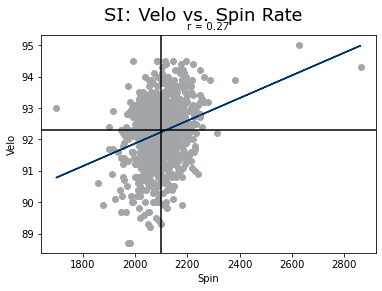

In [48]:
# Define Variables
df = eflin[eflin.pitch_type == 'SI']
data = df.loc[:, ['release_speed', 'release_spin_rate']]
data = data[~data.release_spin_rate.isna() == True]
df = data
x = df['release_spin_rate']
y = df['release_speed']
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'SI: Velo vs. Spin Rate' # Title the graph
xlabel = 'Spin' # Label the x axis
ylabel = 'Velo' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}. Avg Velo = '.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

In [50]:
# Loop

In [81]:
def graph(x,y):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    title = 'Velo vs. Spin Rate' # Title the graph
    xlabel = 'Spin' # Label the x axis
    ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                            ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

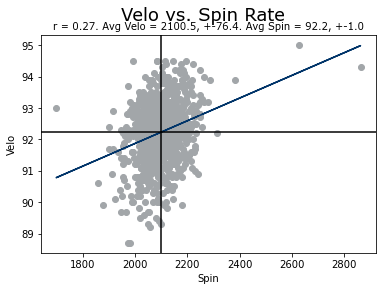

In [64]:
df = eflin[eflin.pitch_type == 'SI']
data = df.loc[:, ['release_speed', 'release_spin_rate']]
data = data[~data.release_spin_rate.isna() == True]
df = data
x = df['release_spin_rate']
y = df['release_speed']
graph(x,y)

In [73]:
pitch_mix(eflin)

,pitch_type,pitch_name,pitches,release_speed,release_spin_rate
4,SI,Sinker,852,92.2,2100.5
1,CU,Curveball,693,79.1,2502.0
2,FC,Cutter,693,88.5,2235.2
3,FF,4-Seam Fastball,162,92.9,2218.4
0,CH,Changeup,132,86.4,1615.8
6,ST,Sweeper,113,79.8,2474.8
5,SL,Slider,7,84.1,2292.1


ST


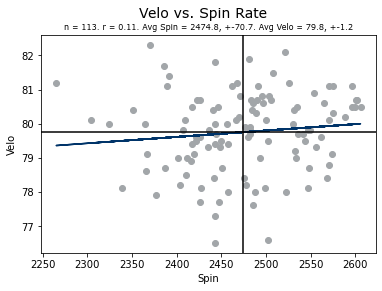

SI


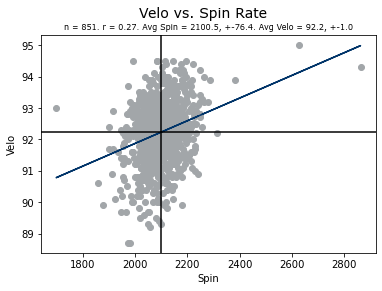

CU


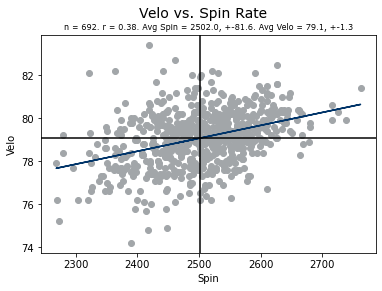

FC


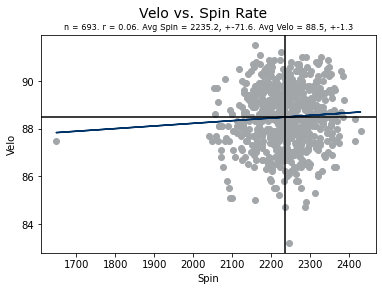

FF


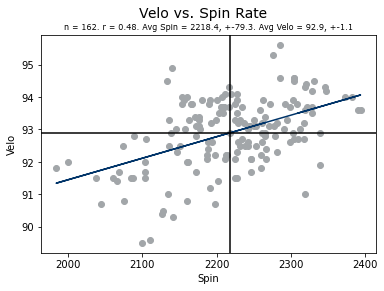

CH


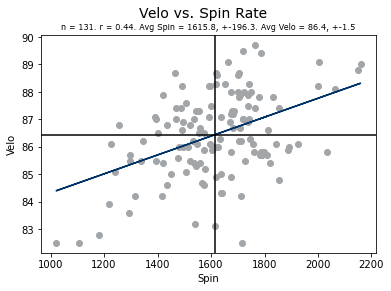

SL


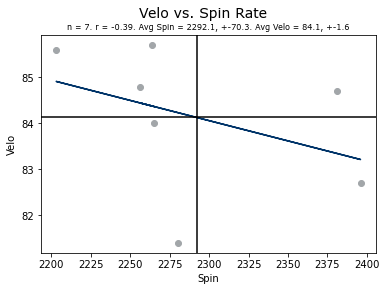

In [82]:
for pt in eflin.pitch_type.unique().tolist():
    print(pt)
    df = eflin[eflin.pitch_type == pt]
    data = df.loc[:, ['release_speed', 'release_spin_rate']]
    data = data[~data.release_spin_rate.isna() == True]
    df = data
    x = df['release_spin_rate']
    y = df['release_speed']
    graph(x,y)

# Who Will Hit 500 Career HR?

## Analysis of Outputs

In [3]:
# an analysis of if Bryce Harper will reach 500 career HR by examining his per season home run rate and remaining peak years

In [4]:
# start with output, that has to come first, then you can examine the inputs.

## Analysis of Inputs

In [2]:
# How well is he driving the baseball?
# What about individual pitch types?
# What is his launch angle?

# Does Kyle Schwarber do damage on the first pitch? Should he be more aggressive early in the count?

In [96]:
schwarber

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B_y,w2B_y,w3B_y,wHR_y,runSB_y,runCS_y,R/PA_y,R/W_y,cFIP_y,source
303741,CU,2022-10-05,79.5,0.89,6.14,"Schwarber, Kyle",656941,664285,strikeout,swinging_strike,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
303742,SI,2022-10-05,93.2,0.85,6.27,"Schwarber, Kyle",656941,664285,NaN,called_strike,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
303743,FC,2022-10-05,82.4,1.34,6.22,"Schwarber, Kyle",656941,664285,NaN,ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
303744,FC,2022-10-05,82.6,1.09,6.11,"Schwarber, Kyle",656941,664285,NaN,called_strike,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
303745,SI,2022-10-05,93.7,0.89,6.15,"Schwarber, Kyle",656941,664285,NaN,ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,FC,2015-06-17,93.1,-2.83,5.78,"Schwarber, Kyle",656941,543766,NaN,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
11445,FC,2015-06-17,92.6,-2.81,5.82,"Schwarber, Kyle",656941,543766,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
11446,SI,2015-06-16,93.1,1.48,5.65,"Schwarber, Kyle",656941,519240,strikeout,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
11447,SL,2015-06-16,85.3,1.56,5.55,"Schwarber, Kyle",656941,519240,NaN,swinging_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
